In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

%matplotlib inline

### need to implement three pricing functions:
1. Black-Scholes pricing formula for European option in the function BS_european_price.
2. Monte Carlo pricing procedure for European option in the function MC_european_price.
3. Monte Carlo pricing procedure for Barrier knock-in option in the function MC_barrier_knockin_price.

In [2]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t=0 
    d1=(np.log(S0/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=d1-sigma*np.sqrt(T-t)
    c=norm.cdf(d1)*S0-norm.cdf(d2)*K*np.exp(-r*(T-t))
    p=norm.cdf(-d2)*K*np.exp(-r*(T-t))-norm.cdf(-d1)*S0

    return c,p



In [15]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):

    paths = np.zeros((numSteps+1, numPaths))
    dT = T/numSteps
    paths[0,:] = S0
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep+1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5*sigma**2)*dT \
                                                            + sigma*np.sqrt(dT)*np.random.normal(0,1))  
    call = np.zeros(numPaths)
    put = np.zeros(numPaths)  
    for iPath in range(numPaths):
        call[iPath] = np.maximum(paths[numSteps,iPath] - K, 0) * np.exp(-r*T)
        put[iPath] = np.maximum(K - paths[numSteps,iPath], 0) * np.exp(-r*T)
    c = np.mean(call)
    p = np.mean(put)
    
    return c, p,paths



In [4]:

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
 

    paths = np.zeros((numSteps+1, numPaths))
    dT = T/numSteps
    paths[0,:] = S0
    for iPath in range(numPaths):
        for iStep in range(numSteps):
               paths[iStep+1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5*sigma**2)*dT\
                                                                    + sigma*np.sqrt(dT)*np.random.normal(0,1))                   
    call = np.zeros(numPaths)
    put = np.zeros(numPaths)
    check = np.zeros(numPaths)
    for iPath in range(numPaths):
        check[iPath] = np.sum(paths[:,iPath] >= Sb)
        if check[iPath] > 0:
            call[iPath] = np.maximum(paths[numSteps,iPath] - K, 0) * np.exp(-r*T)
            put[iPath] = np.maximum(K - paths[numSteps,iPath], 0) * np.exp(-r*T)                
        else:
            call[iPath] = 0
            put[iPath] = 0
    c = np.mean(call)
    p = np.mean(put)
    return c, p




In [10]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10  ## simulate 10 times per year.
numPaths = 10000




# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# # Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step,paths_European_Price_1_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths) 

# # Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step,paths_European_Price_multi_step = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# # Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

# # Plot results
# # --------- Insert your code here --------- #




Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.051468557485098
One-step MC price of an European put option is 7.875079978494445
Multi-step MC price of an European call option is 8.136477849647527
Multi-step MC price of an European put option is 7.8818805137781975
One-step MC price of an Barrier call option is 8.022464904148961
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.307882604432114
Multi-step MC price of an Barrier put option is 1.1559631901618492


Text(0.5, 1.0, 'Geometric Random Walk Paths for Multi-step MC')

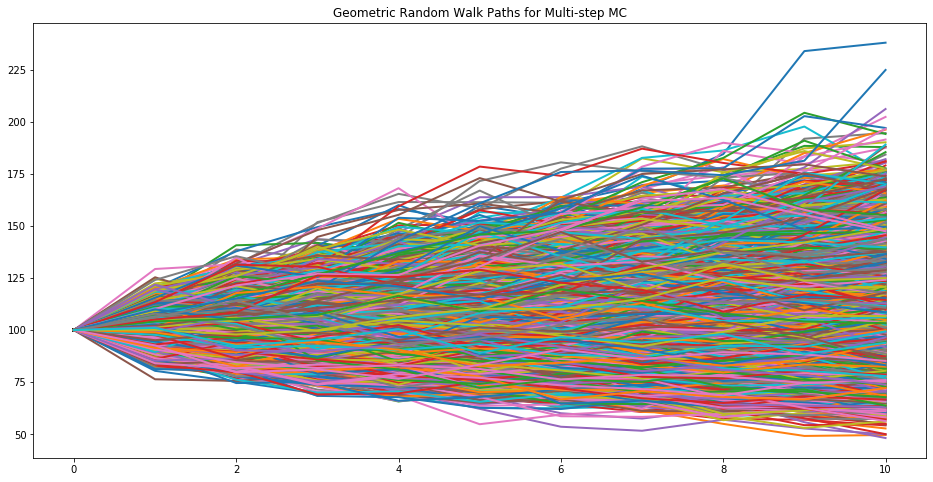

In [11]:
plt.figure(figsize = (16,8))
[plt.plot(paths_European_Price_multi_step[:,i], linewidth=2) for i in range(numPaths)]
plt.title('Geometric Random Walk Paths for Multi-step MC')

### Compute prices of Barrier options with volatility increased and decreased by 10% from the original inputs.

In [12]:
# one-step Monte Carlo pricing procedure for Barrier option with volatility increased and decreased by 10%
callMC_Barrier_Knockin_Price_1_step1, putMC_Barrier_Knockin_Price_1_step1 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility increased and decreased by 10%
callMC_Barrier_Knockin_Price_multi_step1, putMC_Barrier_Knockin_Price_multi_step1 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

# one-step Monte Carlo pricing procedure for Barrier option with volatility decreased and decreased by 10%
callMC_Barrier_Knockin_Price_1_step2, putMC_Barrier_Knockin_Price_1_step2 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased and decreased by 10%
callMC_Barrier_Knockin_Price_multi_step2, putMC_Barrier_Knockin_Price_multi_step2 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)





In [13]:
print('One-step MC price of an Barrier with volatility increased by 10% call option is ' + str(callMC_Barrier_Knockin_Price_1_step1)) 
print('One-step MC price of an Barrier with volatility increased by 10% put option is ' + str(putMC_Barrier_Knockin_Price_1_step1)) 
print('Multi-step MC price of an Barrier with volatility increased by 10% call option is ' + str(callMC_Barrier_Knockin_Price_multi_step1))
print('Multi-step MC price of an Barrier with volatility increased by 10% put option is ' + str(putMC_Barrier_Knockin_Price_multi_step1))
print('One-step MC price of an Barrier with volatility decreased by 10% call option is ' + str(callMC_Barrier_Knockin_Price_1_step2))
print('One-step MC price of an Barrier with volatility decreased by 10% put option is ' + str(putMC_Barrier_Knockin_Price_1_step2))
print('Multi-step MC price of an Barrier with volatility decreased by 10% call option is ' + str(callMC_Barrier_Knockin_Price_multi_step2)) 
print('Multi-step MC price of an Barrier with volatility decreased by 10% put option is ' + str(putMC_Barrier_Knockin_Price_multi_step2))
      
      
      

One-step MC price of an Barrier with volatility increased by 10% call option is 8.73339098362578
One-step MC price of an Barrier with volatility increased by 10% put option is 0.0
Multi-step MC price of an Barrier with volatility increased by 10% call option is 8.873391073306152
Multi-step MC price of an Barrier with volatility increased by 10% put option is 1.4875796550396394
One-step MC price of an Barrier with volatility decreased by 10% call option is 6.8786135254479985
One-step MC price of an Barrier with volatility decreased by 10% put option is 0.0
Multi-step MC price of an Barrier with volatility decreased by 10% call option is 7.26582584751351
Multi-step MC price of an Barrier with volatility decreased by 10% put option is 0.8568668895488714


In [14]:
numPaths_list = [10000,20000,30000,40000,50000, 60000,70000, 80000, 90000, 100000]
numSteps_list = [2,4,12,24,252]

call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)
mc_call = []
mc_put = []
for i in range(len(numPaths_list)):
    for j in range(len(numSteps_list)):
        callMC_European_Price_multi_step, putMC_European_Price_multi_step,paths_European_Price_multi_step= MC_european_price(S0, K, T, r, mu, sigma, numSteps_list[j],numPaths_list[i])
        mc_call.append(callMC_European_Price_multi_step)
        mc_put.append(putMC_European_Price_multi_step)
        for c in range(len(mc_call)):
            if (abs(mc_call[c]-call_BS_European_Price))<0.01:
                if (abs(mc_put[c]-putBS_European_Price))<0.01:
                    print('with',numSteps_list[j],'steps and',numPaths_list[i],'paths,Monte Carlo pricing for European option get the same price with Black-Scholes')
                    print('call price of Monte Carlo for European option =',mc_call[c],'call price of Black-Scholes =',call_BS_European_Price)
                    print('put price of Monte Carlo for European option =',mc_put[c],'put price of Black-Scholes =',putBS_European_Price)
                    print('------------------------------------------------------------------------------------------------')

with 4 steps and 80000 paths,Monte Carlo pricing for European option get the same price with Black-Scholes
call price of Monte Carlo for European option = 8.030908271955042 call price of Black-Scholes = 8.021352235143176
put price of Monte Carlo for European option = 7.905650272167649 put price of Black-Scholes = 7.9004418077181455
------------------------------------------------------------------------------------------------
with 12 steps and 80000 paths,Monte Carlo pricing for European option get the same price with Black-Scholes
call price of Monte Carlo for European option = 8.030908271955042 call price of Black-Scholes = 8.021352235143176
put price of Monte Carlo for European option = 7.905650272167649 put price of Black-Scholes = 7.9004418077181455
------------------------------------------------------------------------------------------------
with 24 steps and 80000 paths,Monte Carlo pricing for European option get the same price with Black-Scholes
call price of Monte Carlo for